# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import linregress

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [2]:
import sklearn
sklearn.__version__

'0.23.2'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

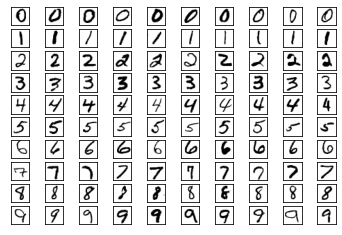

In [4]:
def P1(num_examples=10):

### STUDENT START ###
    def vis_1_digit(single_digit_raw_data):
        single_digit = np.reshape(single_digit_raw_data, (28,28))
        plot = plt.imshow(single_digit, cmap = 'gray_r')
        plt.xticks([])
        plt.yticks([])
        plt.grid(which = 'both', axis = 'both')
        plt.rcParams["figure.figsize"] = (9,9)
        return plot
    keys = mini_train_labels
    values = mini_train_data

    zero, one, two, three, four, five, six, seven, eight, nine = [list() for i in range(10)]
    zero_to_nine_lists = [zero, one, two, three, four, five, six, seven, eight, nine]
    for i in range(len(keys)):
        for j in range(len(zero_to_nine_lists)):
            if keys[i] == str(j):
                zero_to_nine_lists[j].append(values[i])
                
    def ten_plots_per_number(*args):
        '''input each list of numbers (0-9) and it will output a ten by ten plot with ten of each number'''
        def create_10_plots_for_list_of_images(the_list, num_call):
        
            for i in range(10):
                plt.subplot(10,num_examples,i+1+num_call)
                vis_1_digit(the_list[i])
        num_call = -num_examples
        for arg in args:
            num_call = num_call + num_examples
            create_10_plots_for_list_of_images(arg, num_call)

    return ten_plots_per_number(zero, one, two, three, four, five, six, seven, eight, nine)

### STUDENT END ###

P1(10)



### Part 2:

Produce k-Nearest Neighbors models with k $\in$ [1,3,5,7,9].  Evaluate and show the accuracy of each model. For the 1-Nearest Neighbor model, additionally show the precision, recall, and F1 for each label. Which digit is the most difficult for the 1-Nearest Neighbor model to recognize?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In these examples, I will use the number one as the target number

###### What is precision?

    Of all passengers labeled as one, how many are actually one?
   
   $$ Precision = \frac{TP}{TP+FP}  $$

###### What is recall?

    Of all numbers that are truly one, how many did we label as one?
   $$ Recall = \frac{TP}{TP+FN} aka.. Recall = \frac{TP}{All Observations In Actual Labels"} $$
###### What is f1-score?
    Weighted average of precision and recall

###### What is accuracy?
   Ratio of correct predictions to total observations
   $$ Accuracy = \frac{TP+TN}{TP+FP+FN+TN}  $$


In [5]:
def P2(k_values):

### STUDENT START ###
    for i in k_values:
        model = KNeighborsClassifier(n_neighbors = i)
        model.fit(mini_train_data, mini_train_labels)
        test_predictions = model.predict(dev_data)
        print("the accuracy of the " +str(i)+ "-nearest-neighbor model is described by the table below:")
        print(classification_report(dev_labels,test_predictions))
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

the accuracy of the 1-nearest-neighbor model is described by the table below:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

the accuracy of the 3-nearest-neighbor model is described by the table below:
              precision    recall  f1-score   support

           0       0.94      0

### ANSWER: 
    The 8 digit is the most difficult for the 1-nearest-neighbor model to recognize.  To determine which digit is most difficult for the 1-nearest-nieghbor model to recognize, I look at the recall value. Here recall answers: "Of all numbers that are truly one, how many did we label as one?" It is calculated by 'True Positive ones predicted' divided by 'all observations  in the class(true positives + false negatives)'.  Again, the most difficult digit for the 1 nearest neighbor model to recognize is the 8, with the lowest recall value (.77).
    
    The precision, recall, and F1 for each label in the 1-nearest-neighbor model are displayed above, along with those of the other k values.  It is also shown below for clarity:

In [6]:
P2([1])

the accuracy of the 1-nearest-neighbor model is described by the table below:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000



### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on subsets of the train set.  For each subset, take just the first part of the train set without re-ordering.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [7]:
def P3(train_sizes, accuracies, print_classification_report = False):
    performance_report_times = []
### STUDENT START ###
    for i in train_sizes:
        model = KNeighborsClassifier(n_neighbors = 1)
        specific_mini_train_data = mini_train_data[:i]
        specific_mini_train_labels = mini_train_labels[:i]
        model.fit(specific_mini_train_data, specific_mini_train_labels)
        test_predictions = model.predict(dev_data)
        before_performance_eval = time.time()
        classification_report(dev_labels,test_predictions)
        after_performance_eval = time.time()
        performance_eval = classification_report(dev_labels,test_predictions)
        time_to_measure_class_report = after_performance_eval - before_performance_eval
        performance_eval_dict = classification_report(dev_labels,test_predictions, output_dict = True)
        accuracy = performance_eval_dict['accuracy']
        accuracies.append(accuracy)
        performance_report_times.append(time_to_measure_class_report) 
        if print_classification_report == True:
            print("the accuracy of the " +str(i)+ "entry training data model is described by the table below:")
            print(performance_eval)
    train_size_and_accuracies = pd.DataFrame({'train_size':train_sizes, 'accuracy':accuracies, 'time_to_measure_accuracy':performance_report_times})
    return train_size_and_accuracies
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
part_3_answer = P3(train_sizes, accuracies)
part_3_answer 


,train_size,accuracy,time_to_measure_accuracy
0,100,0.702,0.030117
1,200,0.791,0.029403
2,400,0.811,0.029244
3,800,0.866,0.026444
4,1600,0.884,0.025355
5,3200,0.884,0.027703
6,6400,0.884,0.025195
7,12800,0.884,0.026490
8,25600,0.884,0.026464


### Part 4:

Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data.  What's wrong with using linear regression here?

Apply a transformation to the predictor features and a transformation to the outcome that make the predictions more reasonable.  Show $R^2$ of the improved linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data - be sure to display accuracies and training set sizes in appropriate units.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hint re: predictor feature transform: Accuracy increases with training set size logarithmically.
* Hint re: outcome transform: When y is a number in range 0 to 1, then odds(y)=y/(1-y) is a number in range 0 to infinity.

#### Student response begins:
First, I analyze the data with a scatterplot and lineplot to get an idea of what the data to which I will be fitting a regression line looks like. 

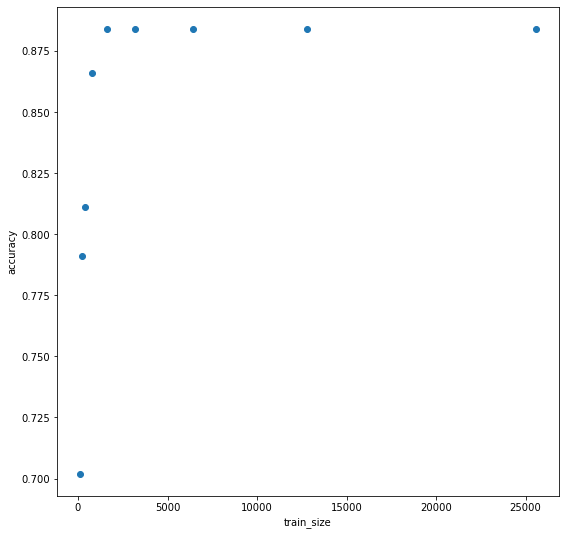

In [8]:
def scatter_the_data():
    plt.scatter(part_3_answer['train_size'],part_3_answer['accuracy'])
    plt.xlabel('train_size')
    plt.ylabel('accuracy')
scatter_the_data()

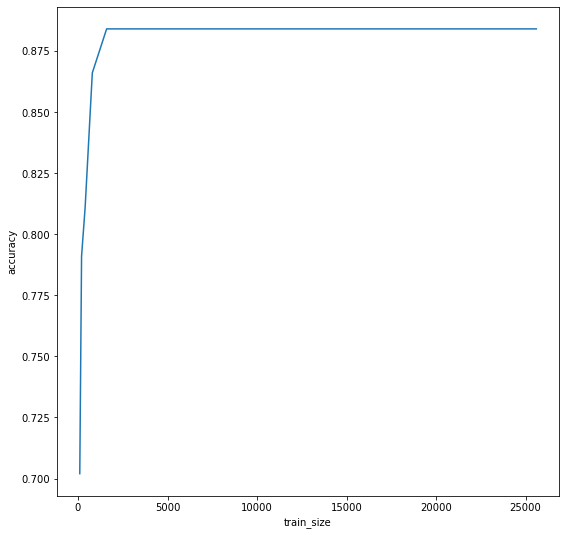

In [18]:
def line_the_data():
    plt.plot(part_3_answer['train_size'],part_3_answer['accuracy'])
    plt.xlabel('train_size')
    plt.ylabel('accuracy')
line_the_data()

I immediately notice that it will be difficult to fit an accurate regression line to this data. Although there is a definite trend, there are very few data points, and data levels off once the training size reaches 1600, after which the data all has the same accuracy of .884. I wonder whether each training size from 1600 forward truly has the same accuracy or whether this is a result of rounding and the accuracy has a very small change that does not show after rounding.  

It is also evident that there is a positive association between training size and accuracy, but that this association is not linear.  A linear regression is thus not an appropriate model to use, at least without a transformation. As it is required by the assignment, I will use it anyway.

In [12]:
def model_prediction_with_ex_df_function():
    x = np.array(part_3_answer['train_size']).reshape(-1,1)
    y = part_3_answer['accuracy']
    model = LinearRegression()
    model.fit(x,y)
    train_sizes_to_be_pred = [60000, 120000,1000000]
    model_prediction_w_ex = model.predict(np.array(train_sizes_to_be_pred).reshape(-1,1))
    model_prediction_with_ex_df = pd.DataFrame({'train_size' : train_sizes_to_be_pred, 'predicted_accuracy' : model_prediction_w_ex })
    return model_prediction_with_ex_df
print('The below table shows the predictions made with a linear regression model to predict accuracy based on amount of training data.  This is the initial un-transformed version:')
model_prediction_with_ex_df_function()

The below table shows the predictions made with a linear regression model to predict accuracy based on amount of training data.  This is the initial un-transformed version:


,train_size,predicted_accuracy
0,60000,1.029255
1,120000,1.234608
2,1000000,4.246464


As can be seen in the cell above, as is, a linear regression model does not work to predict accuracy based on training size with the data being used.  To further explain this, I will create a "lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data."

In [19]:
##sory for using the global namespace in the rest of this section. I tried to minimize it above and everywhere else.
accs = []
model_prediction_with_ex_df = model_prediction_with_ex_df_function()
y_true_df = P3(model_prediction_with_ex_df['train_size'], accs)
y_true_array = np.array(y_true_df['accuracy'])
y_predicted_array = np.array(model_prediction_with_ex_df['predicted_accuracy'])

In [13]:
true_and_expected_accuracy_df = model_prediction_with_ex_df_function()
true_and_expected_accuracy_df['actual_accuracy'] = y_true_array
print('The following table shows the predictions made with the initial linear regression model with untransformed data to predict accuracy based on amount of training data. It also contains the actual accuracy for comparison:')
true_and_expected_accuracy_df

The following table shows the predictions made with the initial linear regression model with untransformed data to predict accuracy based on amount of training data. It also contains the actual accuracy for comparison:


,train_size,predicted_accuracy,actual_accuracy
0,60000,1.029255,0.884
1,120000,1.234608,0.884
2,1000000,4.246464,0.884


In [14]:
#r2_score_of_first_lin_reg_model = r2_score(y_true_array, y_predicted_array)
def r2(x, y):
    r = linregress(y_true_array, y_predicted_array)[2]
    return r**2

r2_score_of_first_lin_reg_model = r2(y_true_array, y_predicted_array)

print('The R2 score of the initial linear regression model as shown above is: ' + str(r2_score_of_first_lin_reg_model))

The R2 score of the initial linear regression model as shown above is: 0.0


/opt/conda/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/opt/conda/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


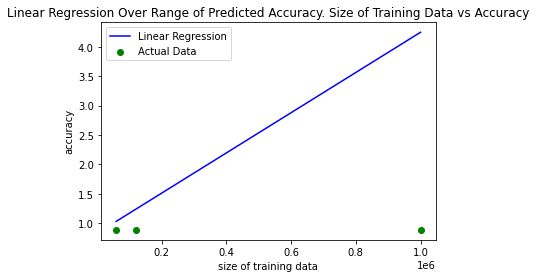

In [15]:
plt.plot(true_and_expected_accuracy_df['train_size'],true_and_expected_accuracy_df['predicted_accuracy'], label = 'Linear Regression', color = 'b')
plt.scatter(true_and_expected_accuracy_df['train_size'],true_and_expected_accuracy_df['actual_accuracy'], label = 'Actual Data', color = 'g')
plt.xlabel('size of training data')
plt.ylabel('accuracy')
plt.title('Linear Regression Over Range of Predicted Accuracy. Size of Training Data vs Accuracy')
plt.legend()
plt.show()

Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data. What's wrong with using linear regression here?

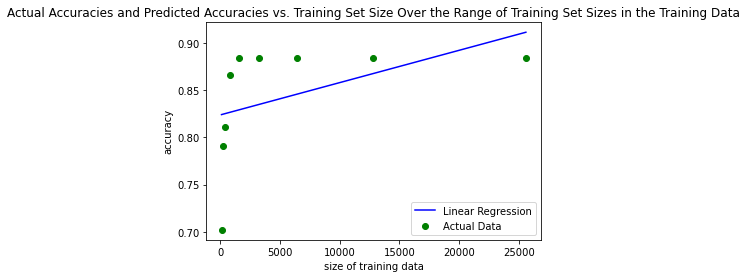

In [16]:
plt.plot(part_3_answer['train_size'],np.array(model.predict(np.array(part_3_answer['train_size']).reshape(-1,1))), label = 'Linear Regression', color = 'b')
plt.scatter(part_3_answer['train_size'],part_3_answer['accuracy'], label = 'Actual Data', color = 'g')
plt.xlabel('size of training data')
plt.ylabel('accuracy')
plt.title('Actual Accuracies and Predicted Accuracies vs. Training Set Size Over the Range of Training Set Sizes in the Training Data')
plt.legend()
plt.show()

##### Answer:  
There are multiple problems with using linear regression here.  One problem is, as evidenced in the graph immediately above, that the association in training data is not linear, so linear regression is not the best model.  The second problem lies within the range of the data.  Linear regression is only appropriate to predict data within the range contained in the training data (in this case, the range of size of training data). I am, however, attempting to predict values above that range. This is shown by the discrepancy between the two above tables. Not only does this cause the prediction to be inaccurate, but due to the nature of what is being predicted, namely accuracy of the 1-nearest-neighbor model, which is measured between 0 and 1, the prediction is not only wrong, but also nonsensical. 

#### Now, I will apply a transformation to make regression more applicable and successful

In [17]:
def reshape(arr):
    [i/(1-i) for i in arr]
    new = arr/(1-arr)
    return new
def unshape(arr):
    new = [i/(1+i) for i in arr]
    return new
def transformed_model():
    x = np.array(part_3_answer['train_size']).reshape(-1,1)
    y = reshape(np.array(part_3_answer['accuracy']))
    a_new_model = LinearRegression()
    a_new_model.fit(x,y)
    train_sizes_to_be_pred = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600, 60000, 120000,1000000]
    model_pred_w_ex = a_new_model.predict(np.array(train_sizes_to_be_pred).reshape(-1,1))
    model_df = pd.DataFrame({'train_size' : train_sizes_to_be_pred, 'predicted_accuracy' : model_pred_w_ex })
    model_df['predicted_accuracy'] = unshape(np.array(model_df['predicted_accuracy']))
    model_df['true_accuracy'] = list(part_3_answer['accuracy']) + list(y_true_array)
    return model_df

print('The below table shows the predictions made with a linear regression model to predict accuracy based on amount of training data.  This is the transformed version:')
model_df = transformed_model()
model_df

The below table shows the predictions made with a linear regression model to predict accuracy based on amount of training data.  This is the transformed version:


,train_size,predicted_accuracy,true_accuracy
0,100,0.843932,0.702
1,200,0.844239,0.791
2,400,0.844848,0.811
3,800,0.846053,0.866
4,1600,0.848407,0.884
5,3200,0.852906,0.884
6,6400,0.861148,0.884
7,12800,0.875140,0.884
8,25600,0.896083,0.884
9,60000,0.928371,0.884


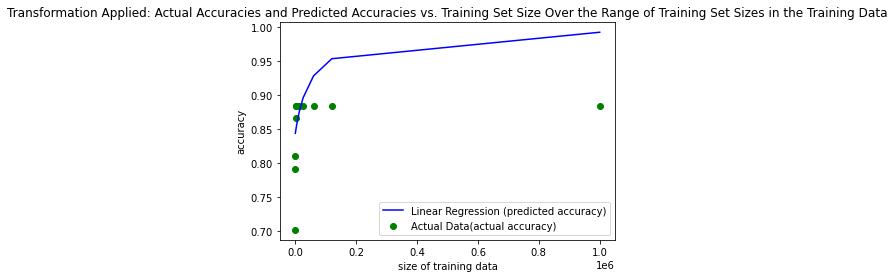

In [18]:
plt.plot(model_df['train_size'],np.array(model_df['predicted_accuracy']).reshape(-1,1), label = 'Linear Regression (predicted accuracy)', color = 'b')
plt.scatter(model_df['train_size'],model_df['true_accuracy'], label = 'Actual Data(actual accuracy)', color = 'g')
plt.xlabel('size of training data')
plt.ylabel('accuracy')
plt.title('Transformation Applied: Actual Accuracies and Predicted Accuracies vs. Training Set Size Over the Range of Training Set Sizes in the Training Data')
plt.legend()
plt.show()

In [19]:
def get_r_squared(xs, ys):
    cm = np.corrcoef(xs, ys)
    corr = cm[0,1]
    r2 = corr**2
    return r2

r2_of_transformed = get_r_squared(model_df['predicted_accuracy'],model_df['true_accuracy'])
print('The R2 score of the transformed linear regression model as shown above is: ' + str(r2_of_transformed))

The R2 score of the transformed linear regression model as shown above is: 0.19240070174982454


In [20]:
def P4():

### STUDENT START ###
    print('The code and answers for part 4 are located above this function')
### STUDENT END ###

P4()

The code and answers for part 4 are located above this function


##### ANSWER: 
The answers are all best explained above, but I will summarize them here to make it easier to grade

r^2 of model without transformation = 0

What is wrong with using linear regression here (without a transformation)?

    Answer pasted from above - but makes most sense in the context of its place in the notebook above: "There are multiple problems with using linear regression here.  One problem is, as evidenced in the graph immediately above, that the association in training data is not linear, so linear regression is not the best model.  The second problem lies within the range of the data.  Linear regression is only appropriate to predict data within the range contained in the training data (in this case, the range of size of training data). I am, however, attempting to predict values above that range. This is shown by the discrepancy between the two above tables. Not only does this cause the prediction to be inaccurate, but due to the nature of what is being predicted, namely accuracy of the 1-nearest-neighbor model, which is measured between 0 and 1, the prediction is not only wrong, but also nonsensical."
    

r^2 of model with transformation = 0.1924

The rest of the answers are output by code above

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

This is the classification report:


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000



This is the confusion matrix:


     0    1   2   3   4   5   6   7   8   9
0  101    0   1   0   0   0   1   1   2   0
1    0  116   1   0   0   0   0   0   1   0
2    1    4  84   2   2   0   2   4   

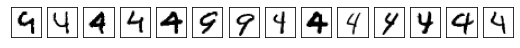

In [17]:
def P5():

### STUDENT START ###
    new_model = KNeighborsClassifier(n_neighbors = 1)
    new_model.fit(mini_train_data, mini_train_labels)
    new_test_predictions = new_model.predict(dev_data)
    print('This is the classification report:')   
    print('\n')
    print(classification_report(dev_labels,new_test_predictions))
    print('\n')    
    conf_matrix = confusion_matrix(dev_labels, new_test_predictions)
    conf_mat_df = pd.DataFrame(conf_matrix)

    def make_df_a_p():
        '''Takes actual values and predictions and creates a DataFrame with index of image in dev data, predicted values, and actual values'''
        df = pd.DataFrame({'index_of_image_in_dev_data':np.arange(1000), 'predicted_values':new_test_predictions, 'actual_values':dev_labels})
        return df

    def confused_digits(confused_digit_1, confused_digit_2):
        '''Takes the make_df_a_p function and creates a list of the data for images that are confused by the knn function as identified by the user in the inputs confused_digit_1 and confused_digit_2 '''
        df = make_df_a_p()
        confused_digits_df = df.loc[((df['predicted_values'] == str(confused_digit_1)) & (df['actual_values'] == str(confused_digit_2))) | ((df['predicted_values'] == str(confused_digit_2)) & (df['actual_values'] == str(confused_digit_1)))]
        confused_digits_images = [dev_data[i] for i in confused_digits_df['index_of_image_in_dev_data']]
        return  confused_digits_images

    def vis_1_digit(single_digit_raw_data):
        single_digit = np.reshape(single_digit_raw_data, (28,28))
        plot = plt.imshow(single_digit, cmap = 'gray_r')
        plt.xticks([])
        plt.yticks([])
        plt.grid(which = 'both', axis = 'both')
        plt.rcParams["figure.figsize"] = (9,9)
        return plot

    def vis_all_digits(list_of_digits_raw_data):
        size = len(list_of_digits_raw_data)
        for i in range(size):
            plt.subplot(1, size, i+1)
            vis_1_digit(list_of_digits_raw_data[i])
    print('This is the confusion matrix:')    
    print('\n')
    print(conf_mat_df)        
    print('\n')
    print('The most confused numbers are 9 and 4. These are the images of the confused nines and fours :')
    return vis_all_digits(confused_digits(9,4))

    
    
    
    
    
### STUDENT END ###

P5()

ANSWER: The most confused numbers are 9 and 4. This can be seen clearly in the confusion matrix. It is also confirmed by the recall values as shown in the classfication report. The actual pictures of these confused values are shown above.

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur filter by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Pick a weight, then produce and evaluate four 1-Nearest Neighbor models by applying your blur filter in these ways:
- Do not use the filter
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracies of the four models evaluated as described.  Try to pick a weight that makes one model's accuracy at least 0.9.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are other Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

### Response Begins Here:


First, I define a function to implement the simplified Gaussian blur as defined in the directions. The weight in the function can be changed, but the weight that will be used for the remainder of part 6 is $ \frac{1}{9} $

In [22]:
def gaussian_blur(input_data, weight=1/9):
    '''This function accepts a weight for the Gaussian function and a numpy array of lists where each list contains the data for one photo.
    It outputs a new array of the same lists, but with Gaussian blur applied that is calculated using 
    the eight neighboring pixels and the specified weight '''
    
    reshaped_mini_train_data = []
    for i in input_data:
        reshaped_mini_train_data.append(np.reshape(i, (28,28)))
    reshaped_mini_train_data = np.array(reshaped_mini_train_data)

    the_filter = weight * np.ones((3,3))
    flat_filter = weight * np.ones(9)

    filtered_version_of_reshaped_mini_train_data = reshaped_mini_train_data *0
    
    for i in range(len(reshaped_mini_train_data)):
        x = reshaped_mini_train_data[i]
        for m in range(len(x)):
            for n in range(len(x[m])):
                neighbors = x[m-1:m+2, n-1:n+2]
                #if neighbors.shape == (1,1):
                #    np.pad(neighbors,(0,2), mode='edge')
                #if neighbors.shape == (2,1):
                #    np.pad(te,((0,1),(2,0)), mode='edge')
                if neighbors.shape != (3,3):
                    reshaped_neighbors = np.reshape(neighbors, -1)
                    num_elements_missing = 9-len(reshaped_neighbors)
                    padded_reshaped_neighbors = np.concatenate((reshaped_neighbors,np.zeros(num_elements_missing)),axis=0)
                    new_value = np.sum(flat_filter*padded_reshaped_neighbors)
                else:   
                    new_value = np.sum(the_filter*neighbors)
                    filtered_version_of_reshaped_mini_train_data[i][m,n] = new_value
                    
        filtered_flat_mini_train_data = []
        for i in filtered_version_of_reshaped_mini_train_data:
            filtered_flat_mini_train_data.append(np.reshape(i,-1))
        filtered_flat_mini_train_data = np.array(filtered_flat_mini_train_data)
    return filtered_flat_mini_train_data
    
    
    


Next, I define a function that I will use to implement a 1 nearest neighbor model more easily in this context

In [23]:
def implement_1knn(train_data,train_labels,dev):
    '''Implements a 1 nearest neighbor knn model given the training data, training labels, and
    dev data. It outputs the predicted labels for the dev set'''
    new_model = KNeighborsClassifier(n_neighbors = 1)
    new_model.fit(train_data, train_labels)
    new_test_predictions = new_model.predict(dev)
    return new_test_predictions

#### 1. Apply no filter and put in 1 nearest neighbor model and evaluate

In [24]:
def no_filter_1nn_eval():
    knn = implement_1knn(mini_train_data, mini_train_labels,dev_data)
    performance_eval_dict = classification_report(dev_labels, knn, output_dict=True)
    accuracy = performance_eval_dict['accuracy']
    print('The Accuracy of the 1-nearest-neighbor model with no filter applied is: '+ str(accuracy))
    print('\n')
    print(classification_report(dev_labels, knn))
    
no_filter_1nn_eval()

The Accuracy of the 1-nearest-neighbor model with no filter applied is: 0.884


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000



#### 2. Filter the training data but not the dev data and apply 1 nearest neighbor model and evaluate

In [25]:
def gaussian_on_training_data_1nn_eval():
    gaus_training_data = gaussian_blur(mini_train_data, weight=1/9)
    knn_gaus_on_training_data = implement_1knn(gaus_training_data, mini_train_labels,dev_data)
    performance_eval_dict = classification_report(dev_labels,knn_gaus_on_training_data, output_dict=True)
    accuracy = performance_eval_dict['accuracy']
    print('The Accuracy of the 1-nearest-neighbor model with the filter applied to only the training data is: '+ str(accuracy))
    print('\n')
    print(classification_report(dev_labels,knn_gaus_on_training_data ))

gaussian_on_training_data_1nn_eval()

The Accuracy of the 1-nearest-neighbor model with the filter applied to only the training data is: 0.907


              precision    recall  f1-score   support

           0       0.94      0.95      0.95       106
           1       0.93      0.97      0.95       118
           2       0.93      0.86      0.89       106
           3       0.94      0.88      0.91        97
           4       0.93      0.85      0.89        92
           5       0.94      0.89      0.91        88
           6       0.92      0.95      0.93       102
           7       0.92      0.94      0.93       102
           8       0.82      0.84      0.83        94
           9       0.80      0.92      0.85        95

    accuracy                           0.91      1000
   macro avg       0.91      0.90      0.91      1000
weighted avg       0.91      0.91      0.91      1000



#### Filter the dev data but not the training data and apply 1 nearest neighbor model and evaluate

In [26]:
def gaussian_on_dev_data_1nn_eval():
    dev_gaus = gaussian_blur(dev_data, weight=1/9)
    knn_gaus_on_dev_data = implement_1knn(mini_train_data, mini_train_labels,dev_gaus)
    performance_eval_dict = classification_report(dev_labels,knn_gaus_on_dev_data, output_dict=True)
    accuracy = performance_eval_dict['accuracy']
    print('The Accuracy of the 1-nearest-neighbor model with the filter applied to only the dev data is: '+ str(accuracy))
    print('\n')
    print(classification_report(dev_labels,knn_gaus_on_dev_data))

gaussian_on_dev_data_1nn_eval()

The Accuracy of the 1-nearest-neighbor model with the filter applied to only the dev data is: 0.868


              precision    recall  f1-score   support

           0       0.96      0.92      0.94       106
           1       0.81      0.98      0.89       118
           2       0.92      0.75      0.83       106
           3       0.92      0.87      0.89        97
           4       0.89      0.82      0.85        92
           5       0.84      0.88      0.86        88
           6       0.88      0.90      0.89       102
           7       0.84      0.94      0.89       102
           8       0.88      0.72      0.80        94
           9       0.78      0.86      0.82        95

    accuracy                           0.87      1000
   macro avg       0.87      0.86      0.87      1000
weighted avg       0.87      0.87      0.87      1000



#### Filter both training data and dev data and apply 1 nearest neighbor model and evaluate

In [27]:
def gaussian_on_dev_and_training_data_1nn_eval():
    dev_gaus = gaussian_blur(dev_data, weight=1/9)
    train_gaus = gaussian_blur(mini_train_data, weight=1/9)
    knn_gaus_on_dev_and_train_data = implement_1knn(train_gaus, mini_train_labels,dev_gaus)
    performace_eval_dict = classification_report(dev_labels,knn_gaus_on_dev_and_train_data,output_dict=True)
    accuracy = performace_eval_dict['accuracy']
    print('The Accuracy of the 1-nearest-neighbor model with the filter applied to both training and dev data is: '+ str(accuracy))
    print('\n')
    print(classification_report(dev_labels,knn_gaus_on_dev_and_train_data))

gaussian_on_dev_and_training_data_1nn_eval()

The Accuracy of the 1-nearest-neighbor model with the filter applied to both training and dev data is: 0.905


              precision    recall  f1-score   support

           0       0.95      0.94      0.95       106
           1       0.93      0.97      0.95       118
           2       0.95      0.84      0.89       106
           3       0.92      0.89      0.91        97
           4       0.95      0.86      0.90        92
           5       0.91      0.88      0.89        88
           6       0.91      0.93      0.92       102
           7       0.88      0.94      0.91       102
           8       0.84      0.84      0.84        94
           9       0.82      0.94      0.87        95

    accuracy                           0.91      1000
   macro avg       0.91      0.90      0.90      1000
weighted avg       0.91      0.91      0.90      1000



#### Conclusion: 

The one-nearest-neighbor model with the filter on only the training data performed the best of the four ways with an accuracy of .907.  

The one-nearest-neighbor model with the filter on both the training data and dev data performed the 2nd best of the four ways with an accuracy only slightly lower: .905.  



### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter to set the white/black separation threshold to 0.1.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data, seting the white/gray/black separation thresholds to 0.1 and 0.9.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

#### Student Work Begins Here:

First, I define a function that will allow me to evaluate a naive bayes model's accuracy and can, if desired, give a brief description of what that accuracy means. 

In [29]:
def evaluate_naive_bayes(model, test_data, test_labels, description=True ):
    """This function takes 4 arguments: model(the actual naive bayes model), 
    test_data (the data for which the model predicted labels), test_labels (the actual labels 
    for test_data), and description (which accepts a boolean with default True). The function outputs
    accuracy, and if description=True, it will also output a brief description of what that accuracy means """
    predictions = model.predict(test_data)
    accuracy = model.score(test_data, test_labels)
    if description == False:
        return accuracy
    else:
        print('The accuracy of this model is: '+str(accuracy)) 
        correct_predictions = [test_labels[i] for i in range(len(test_labels)) if predictions[i]==test_labels[i]]
        print('This means that of the ',len(predictions),' digits we are attempting to predict, ', \
              len(correct_predictions) ,' of the predictions were correct')
    

Next, I will define a function that will allow me to easily create a naive bayes model with the sklearn BernoulliNB function and customize it as needed. It will use the evaluate_naive_bayes function to return the accuracy of the model.

In [30]:
def naive_bayes_bernoulli(train_data, train_labels, test_data, test_labels, binarize_value=0, alpha_value=1, description=True, return_predictions=False):
    """This function creates a naive bayes model with the sklearn BernoulliNB function and returns its accuracy. It accepts 8 inputs. 
    These inputs are: training data, training labels, testing data, testing labels, binarize, alpha, 
    and description. The binarize_value argument accepts a number and binarizes according to the binarize
    agument in the sklearn BernoulliNB function. The binarize_value argument's default value is 0, which 
    assumes that the data is already binary and does nothing.  The alpha_value argument accepts a number as
    input and determines smoothing. Input 0 for no smoothing. The alpha_value argument's default value is 1.
    The description argument accepts a boolean. If false, the function returns accuracy, and if true,
    it prints accuracy and a brief description of what that accuracy means. If return_predictions=True,
    the function will return the predictions instead of the accuracy"""
    bnb = BernoulliNB(binarize=binarize_value, alpha=alpha_value)
    bnb.fit(train_data, train_labels)
    if return_predictions == True:
        predictions = bnb.predict(test_data)
        return predictions
    else:
        return evaluate_naive_bayes(bnb, test_data, test_labels, description)

Next, I define a function to preprocess the data and map pixels to either 0, 1, or 2

In [31]:
def preprocess(data):
    """Accepts one input - an array of lists containing values between 0 and 1, and maps the value 
    to 0,1, or 2"""
    processed_data = data*0
    for i in range(len(data)):
        for j in range(len(data[i])):
            if data[i][j] < .1:
                processed_data[i][j] = 0
            elif (.1<=data[i][j]) and (data[i][j]<.9):
                processed_data[i][j] = 1
            elif data[i][j] >=.9:
                processed_data[i][j] = 2
    return processed_data

Next, I will define a function that will allow me to easily create a naive bayes model with the sklearn MultinomialNB function and customize it as needed. It will use the evaluate_naive_bayes function to return the accuracy of the model and the preprocess function to preprocess the data

In [32]:
def naive_bayes_multinomial(train_data, train_labels, test_data, test_labels, alpha_value=1, description=True, return_predictions=False):
    """This function preprocesses data into 3 categories (0,1,2), creates a naive bayes model with
    the sklearn MultinomialNB function, and returns its accuracy. It accepts 7 inputs. 
    These inputs are: training data, training labels, testing data, testing labels, alpha, description,
    and return_predictions.  The alpha_value argument accepts a number as  input and determines smoothing. 
    Input 0 for no smoothing. The alpha_value argument's default value is 1. The description argument
    accepts a boolean. If false, the function returns accuracy, and if true, it prints accuracy and a 
    brief description of what that accuracy means. If return_predictions=True, the function will return
    the predictions instead of the accuracy"""
    train_data = preprocess(train_data)
    test_data = preprocess(test_data)
    mnb = MultinomialNB(alpha=alpha_value)
    mnb.fit(train_data, train_labels)
    if return_predictions == True:
        predictions = mnb.predict(test_data)
        return predictions
    else:
        return evaluate_naive_bayes(mnb, test_data, test_labels, description)

Below is the implementation of the first model. It uses the sklearn ***BernoulliNB*** function and it maps pixel values to either 0 or 1.

In [33]:
naive_bayes_bernoulli(mini_train_data, mini_train_labels, dev_data, dev_labels, binarize_value=.1)

The accuracy of this model is: 0.814
This means that of the  1000  digits we are attempting to predict,  814  of the predictions were correct


Below is the implementation of the second model. It uses the sklearn ***MultinomialNB*** function and it maps pixel values to either 0, 1, or 2.

In [34]:
naive_bayes_multinomial(mini_train_data, mini_train_labels, dev_data, dev_labels)

The accuracy of this model is: 0.807
This means that of the  1000  digits we are attempting to predict,  807  of the predictions were correct


**ANSWER:**

        Without changing the alpha (smoothing), the bernoulli naive bayes predicts with an accuracy of .814 and the multinomial naive bayes predicts with an accuracy of .807.  The bernoulli version thus performs slightly better than the multinomial version. The multinomial version does not improve the results. This is because it does not provide enough new information to make a difference - most of the same information is present if we only know if a pixel is on or off. To make an improvement, we would have to have significantly more bins, or treat it like the continuous random variable that it is instead of converting it to a discrete random variable.

### Part 8:

Search across several values of the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate performance by 5-fold cross-validation. 
* Use `GridSearchCV(..., ..., cv=..., scoring='accuracy', iid=False)` to vary alpha and evaluate performance by cross-validation.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you had used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

#### Student Work Begins Here:

First, I define a function that will create a bernoulli naive bayes model and evaluate performance across a given range of alpha values

In [36]:
def naive_bayes_bernoulli_alpha_tuning(train_data, train_labels, alpha_range, p8 = False):
    """This function creates a naive bayes model with the sklearn BernoulliNB function with the binarize
    value set to 0 and returns the accuracy of the inputted list of alpha values on the training set 
    using 5-fold cross validation.
    It takes 3 inputs. These inputs are: training data, training labels, and alpha range. 
    The alpha_range argument accepts a list/array of alpha values to test as input. A fourth argument,
    p8, allows the function to work in the p8 function's parameters"""
    def plot_alpha_tuning(df):
        '''This function plots the result of the naive_bayes_bernoulli_alpha_tuning function '''
        plt.plot(df['param_alpha'], df['mean_test_score'])
        plt.xlabel('Value of Alpha Parameter')
        plt.ylabel('Mean Test Score')
        title = 'Alpha Value vs. Mean Test Score in 5-fold Cross Validation'
        plt.title('Alpha Value vs. Mean Test Score in 5-fold Cross Validation')
    bnb = BernoulliNB(alpha = 1, binarize=0)
    classifier = GridSearchCV(bnb, param_grid = {'alpha':alpha_range}, cv=5, scoring='accuracy', iid=False)
    classifier.fit(train_data, train_labels)
    if p8 == False:
        cv_results = pd.DataFrame(classifier.cv_results_)
        plot_alpha_tuning(cv_results)
        cv_results = cv_results.sort_values(by = 'mean_test_score', ascending=False)[['param_alpha','mean_test_score','rank_test_score']]
        return cv_results
    if p8 == True:
        return classifier

Below, I sample a wide range of alpha values in order to determine what range of values to zoom in on to find the optimal value. Because alpha cannot have a value of 0, I start at .001. The values tested are from .001 to 100 with a step of 1

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


,param_alpha,mean_test_score,rank_test_score
0,0.001,0.825,1
1,1.001,0.809,2
2,2.001,0.805,3
3,3.001,0.802,4
4,4.001,0.801,5
...,...,...,...
95,95.001,0.547,96
96,96.001,0.545,97
97,97.001,0.544,98
98,98.001,0.543,99


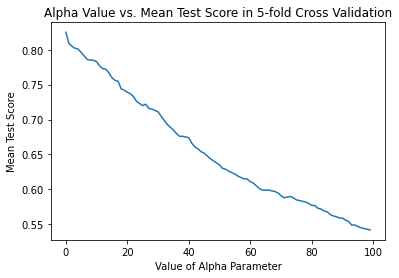

In [37]:
naive_bayes_bernoulli_alpha_tuning(mini_train_data, mini_train_labels, alpha_range = np.arange(.001,100,1) )

As can be seen in the graph and table above, the highest accuracy occurs at .001, which is the closest alpha value to zero taht was tested. The trend is that as alpha gets larger from .001, the accuracy gets lower. Next, I therefore zoom in on a subset of values very close to zero. I search an admittedly excessive range of alpha values in order to find the optimal alpha value and also to explore the change in accuracy when alpha is changed within this range. The following plot and table show the accuracy of each alpha value between .00001 and .0015 with a step of .00001.   Admittedly, the difference in accuracy is so small that it is probably not worth the processing time, but I explore it for curiosity's sake.

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


,param_alpha,mean_test_score,rank_test_score
74,0.00075,0.825,1
100,0.00101,0.825,1
94,0.00095,0.825,1
95,0.00096,0.825,1
96,0.00097,0.825,1
...,...,...,...
6,7e-05,0.819,140
7,8e-05,0.819,140
8,9e-05,0.819,140
1,2e-05,0.818,148


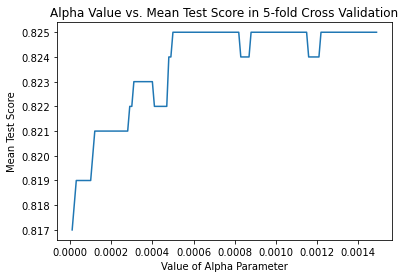

In [38]:
naive_bayes_bernoulli_alpha_tuning(mini_train_data, mini_train_labels, alpha_range = np.arange(.00001,.0015,.00001) )

#### **Part 8 Answer:**
    
    With the level of specificity tested, the optimal alpha value is .00095. The accuracy is therefore highest when the alpha value is close to zero. Once above about .00095, the trend is that the accuracy of the model decreases as alpha increases.  I did expect that the optimal alpha would not be near 1 or above 1, as an alpha of 1 would allow for no elements with a value of 0. I did not, however, expect the optimal value to be so close to 0.



The function below uses the information and functions above, but tests for the alpha values pre-specified in this notebook by the Professor.

In [39]:
def P8(alphas):

### STUDENT START ###
    alpha_test = naive_bayes_bernoulli_alpha_tuning(mini_train_data, mini_train_labels, alpha_range = alphas, p8 = True)
    return alpha_test

### STUDENT END ###

alphas = [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
nb = P8(alphas)
print()
print("Best alpha = ", nb.best_params_)


Best alpha =  {'alpha': 0.001}


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


ANSWER based on alphas provided in this notebook:
    With the level of specificity tested here, the optimal alpha value is .001. The accuracy is therefore highest when the alpha value is close to zero, but the accuracy does decrease from the most accurate alpha (shown here to be around .001) to an alpha of 0. I did expect that the optimal alpha would not be near 1 or above 1, as an alpha of 1 would allow for no elements with a value of 0. I did not, however, expect the optimal value to be so close to 0.

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [40]:
def naive_bayes_gaussian(train_data, train_labels, test_data, test_labels, description=True, return_model=True, var_smoothing=False):
    """This function creates a naive bayes model with the sklearn GaussianNB function and returns 
    its accuracy. It accepts the following inputs: training data, training labels, testing data, 
    testing labels, description, and return_predictions. 
    The description argument accepts a boolean. If false, the function returns accuracy, and if true,
    it prints accuracy and a brief description of what that accuracy means. If return_model=True, the
    descritption argument will be ignored and the function will return the model itself instead of
    the accuracy"""
    
    def evaluate_naive_bayes(model, test_data, test_labels, description=True ):
        """This function takes 4 arguments: model(the actual naive bayes model), 
        test_data (the data for which the model predicted labels), test_labels (the actual labels 
        for test_data), and description (which accepts a boolean with default True). The function outputs
        accuracy, and if description=True, it will also output a brief description of what that accuracy 
        means """
        predictions = model.predict(test_data)
        accuracy = model.score(test_data, test_labels)
        if description == False:
            return accuracy
        else:
            print('The accuracy of this model is: ' + str(accuracy)) 
            correct_predictions = [test_labels[i] for i in range(len(test_labels)) if predictions[i]==test_labels[i]]
            print('This means that of the ',len(predictions),' digits we are attempting to predict, ', \
                  len(correct_predictions) ,' of the predictions were correct')
    if var_smoothing != False:
        g = GaussianNB(var_smoothing=var_smoothing)
    else:
        g = GaussianNB()
        
    g.fit(train_data, train_labels)
    if return_model == True:
        return g
    else:
        return evaluate_naive_bayes(g, test_data, test_labels, description)
    

In the next cell, a gaussian naive bayes model is created, it is trained on the mini_train_data, and its accuracy is evaluated on the dev_data.

In [41]:
naive_bayes_gaussian(mini_train_data, mini_train_labels, dev_data, dev_labels, description=True, return_model=False)

The accuracy of this model is: 0.593
This means that of the  1000  digits we are attempting to predict,  593  of the predictions were correct


As expected, the standard gaussian model performed quite poorly. I will therefore attempt to test different parameters in order to make the model perform better.

The function in the following cell finds the optimal value for var_smoothing, which smooths sigma, which is variance.

In [42]:
def find_optimal_var_smoothing():    
    gnb = GaussianNB()
    gnb_optimize = GridSearchCV(gnb, param_grid = {'var_smoothing':np.logspace(0,-10, num=110)}, cv=5, scoring='accuracy', iid=False)
    gnb_opt = gnb_optimize.fit(mini_train_data, mini_train_labels)
    return gnb_opt.best_params_['var_smoothing']

In the following cell, the gaussian NB model will be implemented, but with the optimized var_smoothing parameter:

In [43]:
naive_bayes_gaussian(mini_train_data, mini_train_labels, dev_data, dev_labels, 
                     description=True, return_model=False, var_smoothing = find_optimal_var_smoothing())

The accuracy of this model is: 0.814
This means that of the  1000  digits we are attempting to predict,  814  of the predictions were correct


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [44]:
def P9():

### STUDENT END ###
    before_fix = naive_bayes_gaussian(mini_train_data, mini_train_labels, dev_data, dev_labels,
                                      description=False, return_model=False)
    after_fix = naive_bayes_gaussian(mini_train_data, mini_train_labels, dev_data, dev_labels, 
                     description=False, return_model=False, var_smoothing = find_optimal_var_smoothing())

    print('Before the fix, the model accuracy was: ',before_fix)
    print()
    print('After the fix, which was to optmize the var_smoothing parameter of the GaussianNB function using the GridSearchCV function with 5-fold cross validation across 110 possible values between 10**-10 and 10**0, the model accuracy was: ', after_fix)
    
### STUDENT END ###

P9()

Before the fix, the model accuracy was:  0.593

After the fix, which was to optmize the var_smoothing parameter of the GaussianNB function using the GridSearchCV function with 5-fold cross validation across 110 possible values between 10**-10 and 10**0, the model accuracy was:  0.814


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


ANSWER: The first part of this answer is output by the cell above.  The issue here was that the GaussianNB function assumes a normal distribution, but this is not the case with the data. The var_smoothing optimization explained and carried out above smooths sigma/variance, which accounts for the GaussianNB function's assumption of a normal distribution.

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

**Student Response Begins:**

First, I create a Bernoulli Naive Bayes model. I will use the earlier discovered optimum alpha value of .00095.

In [361]:
def quick_bnb():
    bnb = BernoulliNB(binarize = .1,alpha=.00095)
    bnb.fit(mini_train_data, mini_train_labels)
    return bnb

Next, I paste the function from part 1 to visualize one digit so that each section runs independently

In [364]:
 def vis_1_digit(single_digit_raw_data):
        single_digit = np.reshape(single_digit_raw_data, (28,28))
        plot = plt.imshow(single_digit, cmap = 'gray_r')
        plt.xticks([])
        plt.yticks([])
        plt.grid(which = 'both', axis = 'both')
        plt.rcParams["figure.figsize"] = (4,4)
        return plot

I develop two ways to generate digits, each with equivalent results. I will show both of them, although I prefer the second because it is simpler.
This is the first method, which is based on the directions and notes given in this notebook for this section. It uses the np.random.rand function as reccomended:

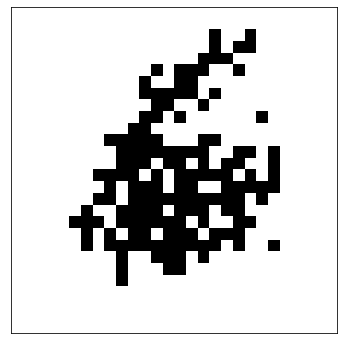

In [365]:
def generate_one_num_random_rand(model, number):
    a = np.random.rand(10,784)
    lp = model.feature_log_prob_
    reg = np.exp(lp)
    new_number_array = 0*reg[number]
    for i in range(len(a[number])):
        if a[number][i]<=reg[number][i]:
            new_number_array[i] = 1
        else:
            new_number_array[i] = 0
    return new_number_array

vis_1_digit(generate_one_num_random_rand(quick_bnb(),6))

This is the second method. It uses np.random.choice and a for loop to choose between 0 and 1 with the probabilities given by np.exp of the log probabilities given by the Bernoulli model:

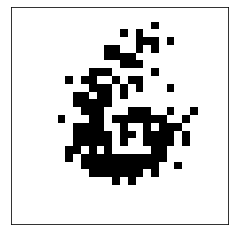

In [366]:
def generate_one_num_random_choice(model, num):
    log_probs = model.feature_log_prob_
    regular_probs = np.exp(log_probs)
    new_digit = []
    for i in regular_probs[num]:
        x = np.random.choice(np.array([0,1]),p = [1-i, i])
        new_digit.append(x)
    return new_digit

vis_1_digit(generate_one_num_random_choice(quick_bnb(), 6))


Next, I generate 20 of each number with the first model:

In [367]:
def generate_20_of_each_num():
    bnb = quick_bnb()
    all_nums = []
    for number in range(10):
        for ex_of_number in range(20):
            all_nums.append(generate_one_num_random_rand(bnb, number))
    array_of_all_nums = np.array(all_nums)
    return array_of_all_nums

In [378]:
def visualize_20_of_each_num():
    twenty_of_each = generate_20_of_each_num()
    reshaped_twenty_of_each = []
    for i in range(len(twenty_of_each)):
        reshaped_twenty_of_each.append(np.reshape(twenty_of_each[i],(28,28)))
    reshaped_twenty_of_each = np.array(reshaped_twenty_of_each)
    for num in range(200):
        plt.subplot(10,20,num+1)
        plt.imshow(reshaped_twenty_of_each[num], cmap = 'gray_r')
        plt.grid(which = 'both', axis = 'both')
        plt.rcParams["figure.figsize"] = (28,28)
    return plt.show()
    #return reshaped_twenty_of_each

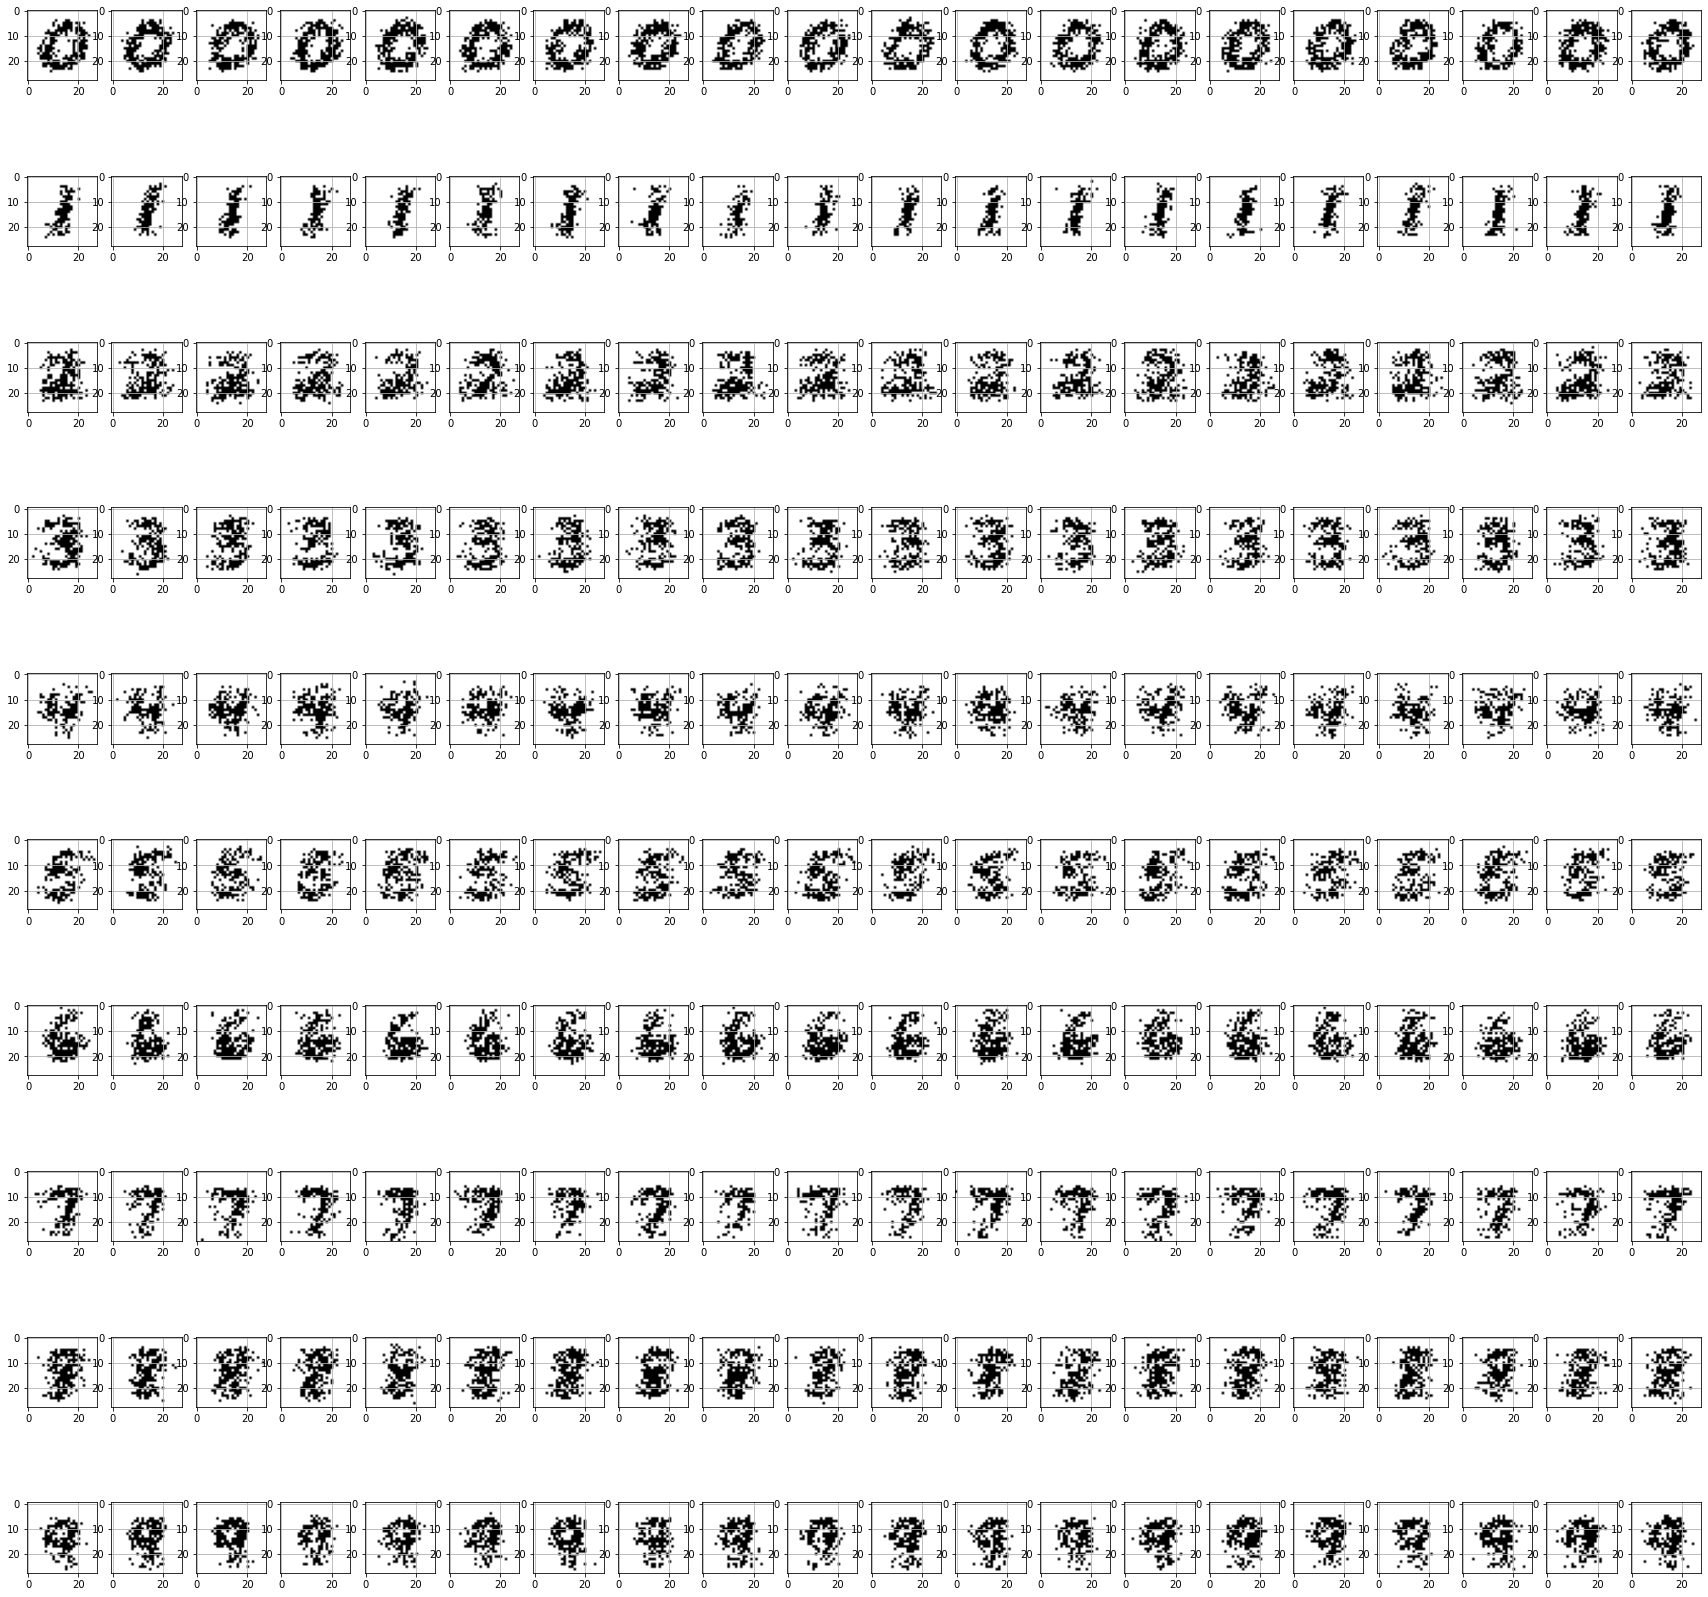

In [379]:
visualize_20_of_each_num()

**ANSWER:** The generated images are legible when small and barely legible when large.  Almost all of the original images are legible either way.  The "writing" of the generated images is sporadic and full of holes, whereas almost all parts of the original images are contiguous.

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Set LaPlace smoothing (alpha) to the optimal value (from part 8).
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate perfromance on the dev set.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [422]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    def new_bernoulli_model():
        bnb = BernoulliNB(alpha = .00095, binarize = 0)
        bnb.fit(mini_train_data, mini_train_labels)
        return bnb
    
    bnb = new_bernoulli_model()
    predicted_labels = bnb.predict(dev_data)
    predicted_probabilities = bnb.predict_proba(dev_data)


    for i in range(len(predicted_probabilities)):
        for j in range(len(buckets)):
            if j==0:
                if (predicted_probabilities[i].max() <= buckets[j]):
                    total[j] +=1
                    if predicted_labels[i] == dev_labels[i]:
                        correct[j] += 1
            elif j == range(len(buckets))[-1]:
                if (predicted_probabilities[i].max() <= buckets[j]) and  (predicted_probabilities[i].max() > buckets[j-1]) :
                    total[j] +=1
                    if predicted_labels[i] == dev_labels[i]:
                        correct[j] += 1
            elif (predicted_probabilities[i].max() <= buckets[j]) and (predicted_probabilities[i].max()<buckets[j+1]) and (predicted_probabilities[i].max()>buckets[j-1]):
                total[j] +=1
                if predicted_labels[i] == dev_labels[i]:
                    correct[j] += 1
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

p(pred) is 0.0000000000000 to 0.5000000000000    total =   0    accuracy = 0.000
p(pred) is 0.5000000000000 to 0.9000000000000    total =  31    accuracy = 0.355
p(pred) is 0.9000000000000 to 0.9990000000000    total =  68    accuracy = 0.426
p(pred) is 0.9990000000000 to 0.9999900000000    total =  58    accuracy = 0.466
p(pred) is 0.9999900000000 to 0.9999999000000    total =  46    accuracy = 0.652
p(pred) is 0.9999999000000 to 0.9999999990000    total =  62    accuracy = 0.774
p(pred) is 0.9999999990000 to 0.9999999999900    total =  33    accuracy = 0.788
p(pred) is 0.9999999999900 to 0.9999999999999    total =  43    accuracy = 0.791
p(pred) is 0.9999999999999 to 1.0000000000000    total = 659    accuracy = 0.938


ANSWER:

I would classify this classifier as a weakly calibrated classifier. There is a positive association between posterior probability and accuracy, so it is better than a poorly calibrated classifier, but the accuracy is much lower than 90% when the posterior probability of the predicted class is 0.9, so it is not strongly calibrated.